In [2]:
import os
import numpy as np
import librosa 
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# import librosa.display
# import tkinter as tk
# path="wav_files"



In [3]:
features=[]
loc="spects"
for i in os.listdir(loc):
    location=loc+"/"+i
    features.append(location)

In [72]:
# import IPython.display as ipd
# ipd.Audio("wav_files/XC4971.wav")

In [19]:
data_filepath = "modified_files.csv"
df = pd.read_csv(data_filepath)

,Unnamed: 0,country,duration_seconds,english_cname,file_id,file_name,file_url,genus,latitude,license,location,longitude,recordist,recordist_url,sonogram_url,species,type,remarks,full_name,fil_ename
0,0,United States,3,Abert's Towhee,17804,XC17804.mp3.wav,https://www.xeno-canto.org/17804/download,Melozone,33.3117,http://creativecommons.org/licenses/by-nc-nd/2.5/,"Cibola National Wildlife Refuge, Cibola, Arizo...",-114.68912,Nathan Pieplow,https://www.xeno-canto.org/contributor/EKKJJJRDJY,https://www.xeno-canto.org/sounds/uploaded/EKK...,aberti,'seet' call,XC17804 © Nathan Pieplow // Cibola National Wi...,Abert's Towhee (Melozone aberti),XC17804
1,1,United States,4,Abert's Towhee,177367,XC177367.mp3.wav,https://www.xeno-canto.org/177367/download,Melozone,34.2850,http://creativecommons.org/licenses/by-nc-sa/4.0/,"Bill Williams River NWR, Arizona, United States",-114.06900,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,call,XC177367 © Lauren Harter // Bill Williams Rive...,Abert's Towhee (Melozone aberti dumeticola),XC177367
2,2,United States,4,Abert's Towhee,145505,XC145505.mp3.wav,https://www.xeno-canto.org/145505/download,Melozone,34.2850,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Bill Williams River NWR, Arizona, United States",-114.06900,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,Squeal duet,XC145505 © Lauren Harter // Bill Williams Rive...,Abert's Towhee (Melozone aberti dumeticola),XC145505
3,3,United States,5,Abert's Towhee,228159,XC228159.mp3.wav,https://www.xeno-canto.org/228159/download,Melozone,33.1188,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Salton Sea, CA, United States",-115.79450,Peter Boesman,https://www.xeno-canto.org/contributor/OOECIWCSWV,https://www.xeno-canto.org/sounds/uploaded/OOE...,aberti,interaction duet,"XC228159 © Peter Boesman // Salton Sea, CA, Un...",Abert's Towhee (Melozone aberti),XC228159
4,4,United States,5,Abert's Towhee,51313,XC51313.mp3.wav,https://www.xeno-canto.org/51313/download,Melozone,36.0628,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Sunset Park, Las Vegas, Nevada, United States",-115.11280,Mike Nelson,https://www.xeno-canto.org/contributor/PWDLINYMKL,https://www.xeno-canto.org/sounds/uploaded/PWD...,aberti,call,"XC51313 © Mike Nelson // Sunset Park, Las Vega...",Abert's Towhee (Melozone aberti dumeticola),XC51313
5,5,United States,6,Abert's Towhee,111831,XC111831.mp3.wav,https://www.xeno-canto.org/111831/download,Melozone,32.7430,http://creativecommons.org/licenses/by-nc-nd/2.5/,"Quigley Wildlife Management Area, Yuma County,...",-113.95500,Richard E Webster,https://www.xeno-canto.org/contributor/KZYUWIRZVH,https://www.xeno-canto.org/sounds/uploaded/KZY...,aberti,call,XC111831 © Richard E Webster // Quigley Wildli...,Abert's Towhee (Melozone aberti aberti),XC111831
6,6,United States,6,Abert's Towhee,289047,XC289047.mp3.wav,https://www.xeno-canto.org/289047/download,Melozone,34.2599,http://creativecommons.org/licenses/by-nc-sa/4.0/,"Quail Hollow, San Bernardino County, Californi...",-114.15670,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,call,"XC289047 © Lauren Harter // Quail Hollow, San ...",Abert's Towhee (Melozone aberti),XC289047
7,7,United States,7,Abert's Towhee,119222,XC119222.mp3.wav,https://www.xeno-canto.org/119222/download,Melozone,36.5130,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Overton WMA, Clark County, Nevada, United States",-114.41800,Ryan P. O'Donnell,https://www.xeno-canto.org/contributor/SDXVTLDNGJ,https://www.xeno-canto.org/sounds/uploaded/SDX...,aberti,call,"XC119222 © Ryan P. O'Donnell // Overton WMA, C...",Abert's Towhee (Melozone aberti),XC119222
8,8,United States,8,Abert's Towhee,314730,XC314730.mp3.wav,https://www.xeno-canto.org/314730/download,Melozone,32.7257,http://creativecommons.org/licenses/by-

In [21]:
# df['fil_ename'] = df['file_name'].str.rsplit('.').str[0]  # Get the base name without extension

# # Add the new extension ".txt"
# df['file_name'] = df['fil_ename'] + ".wav"

In [20]:

# from pydub import AudioSegment
# import os

# # Load the MP3 file (replace 'example.mp3' with your MP3 file)
# mp3_file = "example.mp3"
# wav_file = "example.wav"

# try:
#     # Load the audio segment
#     audio_segment = AudioSegment.from_file(mp3_file, format="mp3")
    
#     # Export to WAV
#     audio_segment.export(wav_file, format="wav")

#     print("Conversion successful! WAV file created.")
# except Exception as e:
#     print("An error occurred:", e)

'wav_files'

In [7]:
def extraction(path):
    x,sample_rate=librosa.load(path,res_type='kaiser_fast')
    mfcc=np.mean(librosa.feature.mfcc(y=x,sr=sample_rate,n_mfcc=40).T,axis=0)
    return mfcc

In [23]:
df['file_name'] = df['fil_ename'] + ".wav"
df.head(10)

,Unnamed: 0,country,duration_seconds,english_cname,file_id,file_name,file_url,genus,latitude,license,location,longitude,recordist,recordist_url,sonogram_url,species,type,remarks,full_name,fil_ename
0,0,United States,3,Abert's Towhee,17804,XC17804.wav,https://www.xeno-canto.org/17804/download,Melozone,33.3117,http://creativecommons.org/licenses/by-nc-nd/2.5/,"Cibola National Wildlife Refuge, Cibola, Arizo...",-114.68912,Nathan Pieplow,https://www.xeno-canto.org/contributor/EKKJJJRDJY,https://www.xeno-canto.org/sounds/uploaded/EKK...,aberti,'seet' call,XC17804 © Nathan Pieplow // Cibola National Wi...,Abert's Towhee (Melozone aberti),XC17804
1,1,United States,4,Abert's Towhee,177367,XC177367.wav,https://www.xeno-canto.org/177367/download,Melozone,34.2850,http://creativecommons.org/licenses/by-nc-sa/4.0/,"Bill Williams River NWR, Arizona, United States",-114.06900,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,call,XC177367 © Lauren Harter // Bill Williams Rive...,Abert's Towhee (Melozone aberti dumeticola),XC177367
2,2,United States,4,Abert's Towhee,145505,XC145505.wav,https://www.xeno-canto.org/145505/download,Melozone,34.2850,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Bill Williams River NWR, Arizona, United States",-114.06900,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,Squeal duet,XC145505 © Lauren Harter // Bill Williams Rive...,Abert's Towhee (Melozone aberti dumeticola),XC145505
3,3,United States,5,Abert's Towhee,228159,XC228159.wav,https://www.xeno-canto.org/228159/download,Melozone,33.1188,http://creativecommons.org/licenses/by-nc-nd/4.0/,"Salton Sea, CA, United States",-115.79450,Peter Boesman,https://www.xeno-canto.org/contributor/OOECIWCSWV,https://www.xeno-canto.org/sounds/uploaded/OOE...,aberti,interaction duet,"XC228159 © Peter Boesman // Salton Sea, CA, Un...",Abert's Towhee (Melozone aberti),XC228159
4,4,United States,5,Abert's Towhee,51313,XC51313.wav,https://www.xeno-canto.org/51313/download,Melozone,36.0628,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Sunset Park, Las Vegas, Nevada, United States",-115.11280,Mike Nelson,https://www.xeno-canto.org/contributor/PWDLINYMKL,https://www.xeno-canto.org/sounds/uploaded/PWD...,aberti,call,"XC51313 © Mike Nelson // Sunset Park, Las Vega...",Abert's Towhee (Melozone aberti dumeticola),XC51313
5,5,United States,6,Abert's Towhee,111831,XC111831.wav,https://www.xeno-canto.org/111831/download,Melozone,32.7430,http://creativecommons.org/licenses/by-nc-nd/2.5/,"Quigley Wildlife Management Area, Yuma County,...",-113.95500,Richard E Webster,https://www.xeno-canto.org/contributor/KZYUWIRZVH,https://www.xeno-canto.org/sounds/uploaded/KZY...,aberti,call,XC111831 © Richard E Webster // Quigley Wildli...,Abert's Towhee (Melozone aberti aberti),XC111831
6,6,United States,6,Abert's Towhee,289047,XC289047.wav,https://www.xeno-canto.org/289047/download,Melozone,34.2599,http://creativecommons.org/licenses/by-nc-sa/4.0/,"Quail Hollow, San Bernardino County, Californi...",-114.15670,Lauren Harter,https://www.xeno-canto.org/contributor/YQNGFTBRRT,https://www.xeno-canto.org/sounds/uploaded/YQN...,aberti,call,"XC289047 © Lauren Harter // Quail Hollow, San ...",Abert's Towhee (Melozone aberti),XC289047
7,7,United States,7,Abert's Towhee,119222,XC119222.wav,https://www.xeno-canto.org/119222/download,Melozone,36.5130,http://creativecommons.org/licenses/by-nc-sa/3.0/,"Overton WMA, Clark County, Nevada, United States",-114.41800,Ryan P. O'Donnell,https://www.xeno-canto.org/contributor/SDXVTLDNGJ,https://www.xeno-canto.org/sounds/uploaded/SDX...,aberti,call,"XC119222 © Ryan P. O'Donnell // Overton WMA, C...",Abert's Towhee (Melozone aberti),XC119222
8,8,United States,8,Abert's Towhee,314730,XC314730.wav,https://www.xeno-canto.org/314730/download,Melozone,32.7257,http://creativecommons.org/licenses/by-nc-sa/4.0/,"Yuma East Wetlands, Yuma

In [24]:
extracted_Features=[]
from tqdm import tqdm
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = "wav_files"+'/'+str(row["file_name"])
    final_class_labels=row["full_name"]
    data=extraction(file_name)
    extracted_features.append([data,final_class_labels])


0it [00:04, ?it/s]


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File C:\Users\sathv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")

In [4]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

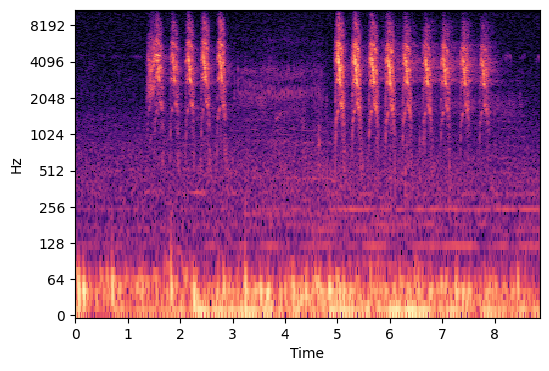

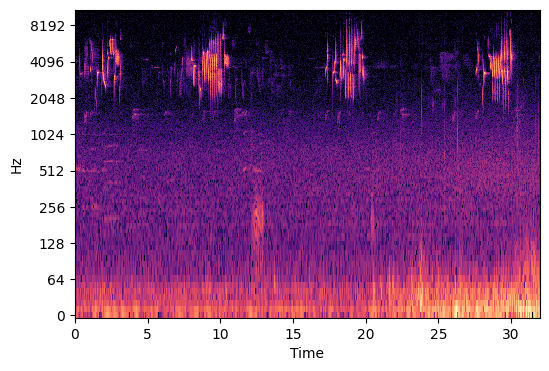

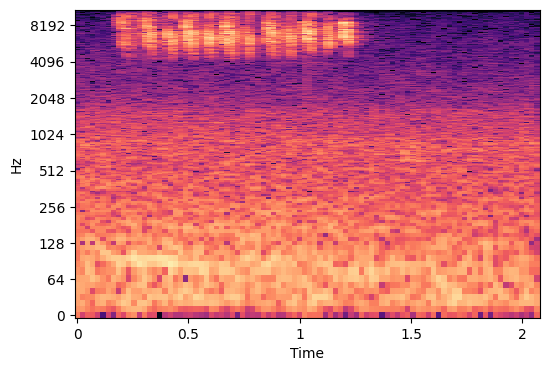

In [12]:
display=Tk()
display.title("Audio_Classifier")
display.minsize(width=1100,height=500)

l1=Label(display,text="Select from below to view their spectograms!",fg="purple",bg="lightblue",font=("Times 20 bold"))
l1.pack()

listbox2= Listbox(display, selectmode=SINGLE, height=5)
listbox2.place(x=450,y=110)
 

def selection(event):
    selected_index = listbox2.curselection()
    if selected_index:
        selected_option = listbox2.get(selected_index)
    y, sr = librosa.load(selected_option)  # Load with the original sample rate

    # Compute the Short-Time Fourier Transform (STFT) to get the spectrogram
    D = librosa.stft(y)  # Complex-valued spectrogram
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to decibels for visualization

    fig, axs = plt.subplots(figsize=(6, 4)) 
    
    librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log")  # Log scale on y-axis 
    canvas = FigureCanvasTkAgg(fig, master=display)
    canvas_widget = canvas.get_tk_widget()
    

    canvas_widget.place(x=100,y=200)    
      
listbox2.bind("<<ListboxSelect>>", selection) 
c=0        
for i in features:
    c+=1
    listbox2.insert(END, str(i))
    if c==100:
        break
        


    
display.mainloop()
